In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize , sent_tokenize
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from  sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
import nltk
import string


In [14]:
import string
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (9)\spam.csv", encoding='ISO-8859-1')

In [16]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
151,ham,Yup i thk cine is better cos no need 2 go down...,NaN,NaN,NaN
1372,ham,1) Go to write msg 2) Put on Dictionary mode 3...,NaN,NaN,NaN
973,ham,what is your account number?,NaN,NaN,NaN
3956,ham,Where is that one day training:-),NaN,NaN,NaN


In [17]:
data.shape

(5572, 5)

## Data Cleaning 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
# drop last 3 column 
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [21]:
data.sample(5)

,v1,v2
4463,ham,Ranjith cal drpd Deeraj and deepak 5min hold
1823,ham,Same as u... Dun wan... Y u dun like me alread...
1864,ham,You call him now ok i said call him
4535,ham,Never blame a day in ur life. Good days give u...
1603,ham,Have you heard about that job? I'm going to th...


In [22]:
# change column name 
data=data.rename(columns={'v1':'target','v2':'text'})

In [23]:
data["target"].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [24]:
# convert terget category column into number
encoder=LabelEncoder()
data["target"]=encoder.fit_transform(data["target"])

In [25]:
# find missing value
data.isnull().sum()

target    0
text      0
dtype: int64

In [26]:
# check duplicate values
data.duplicated().sum()

403

In [27]:
# remove duplicate 
data=data.drop_duplicates(keep="first")

In [28]:
# check duplicate values 
data.duplicated().sum()

0

In [29]:
data.shape

(5169, 2)

## EDA - Exploratory Data Analysis

In [31]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

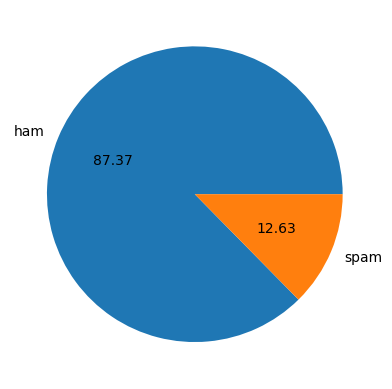

In [32]:
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [33]:
# find to nnumber of lenth in text column
data['no_of_characters']=data['text'].apply(len)

In [34]:
# find the number of words in text column
# data['text'].apply(lambda x:nltk.word_tokenize(x)) # separate words
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x))) # len of separate 

In [35]:
# find the numbers of sentences 
# data['text'].apply(lambda x:nltk.sent_tokenize(x)) # separate by sentences
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [36]:
data

,target,text,no_of_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [37]:
data[["no_of_characters","num_words","num_sentences"]].describe()

,no_of_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# ham msgs
data[data['target']==0][["no_of_characters","num_words","num_sentences"]].describe()

,no_of_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# spam msgs
data[data['target']==1][["no_of_characters","num_words","num_sentences"]].describe()

,no_of_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


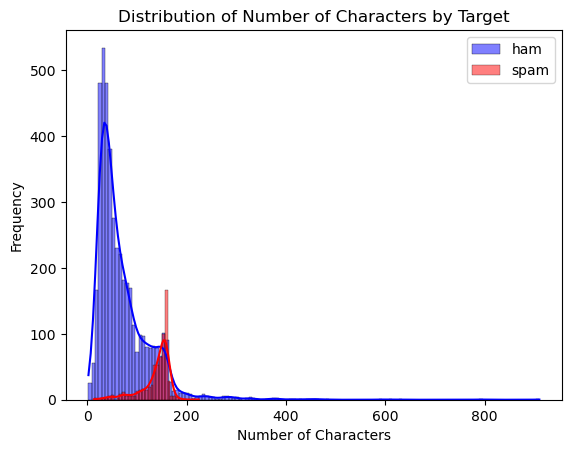

In [40]:
# Plot histograms for 'no_of_characters' where 'target' is 0 and 1
sns.histplot(data[data['target'] == 0]['no_of_characters'], color='blue', label='ham', kde=True)
sns.histplot(data[data['target'] == 1]['no_of_characters'], color='red', label='spam', kde=True)
# Add labels and legend
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters by Target')
plt.legend()
# Show the plot
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


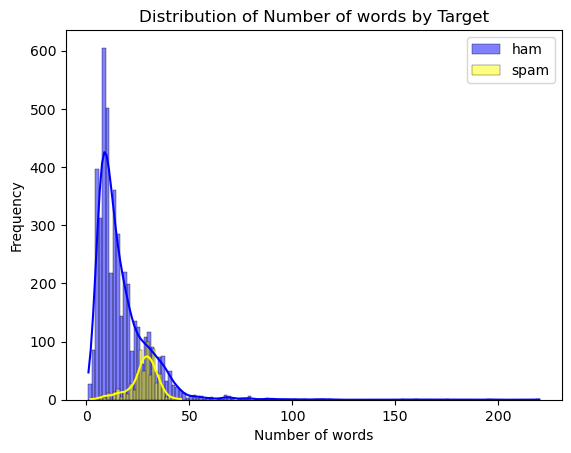

In [41]:
# Plot histograms for 'num_words' where 'target' is 0 and 1
sns.histplot(data[data['target'] == 0]['num_words'], color='blue', label='ham', kde=True)
sns.histplot(data[data['target'] == 1]['num_words'], color='yellow', label='spam', kde=True)
# Add labels and legend
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of words by Target')
plt.legend()
# Show the plot
plt.show()

In [42]:
# data[(data['target'] == 0) & (data['no_of_characters'] == 111)]

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


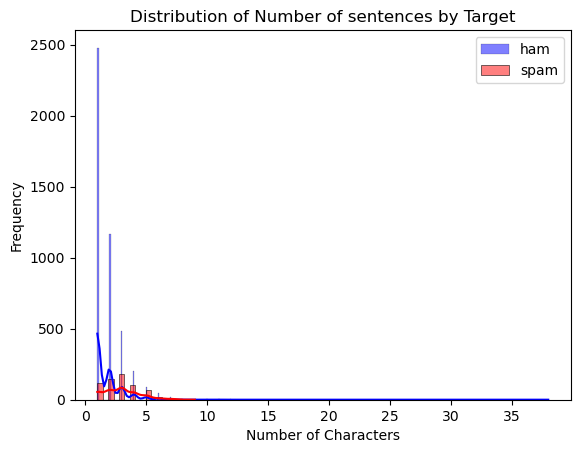

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for 'num_sentences' where 'target' is 0 and 1
sns.histplot(data[data['target'] == 0]['num_sentences'], color='blue', label='ham', kde=True)
sns.histplot(data[data['target'] == 1]['num_sentences'], color='red', label='spam', kde=True)

# Add labels and legend
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Number of sentences by Target')
plt.legend()

# Show the plot
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

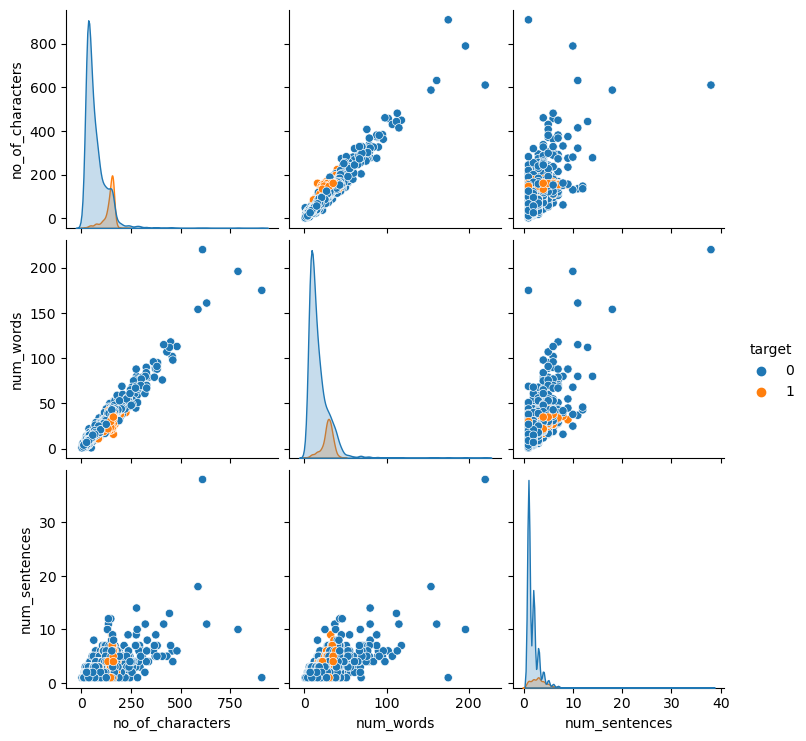

In [44]:
sns.pairplot(data,hue='target')

## Data Preprocessing 
lowercase/
tokenization/
Removing special characters/
removing stop words and punctuation/
stemming

In [46]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():  # punctation mark ko hatane ke liy
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:        
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y) # string me return kiya hai

In [47]:
data['transformed_text'] = data['text'].apply(transform_text)

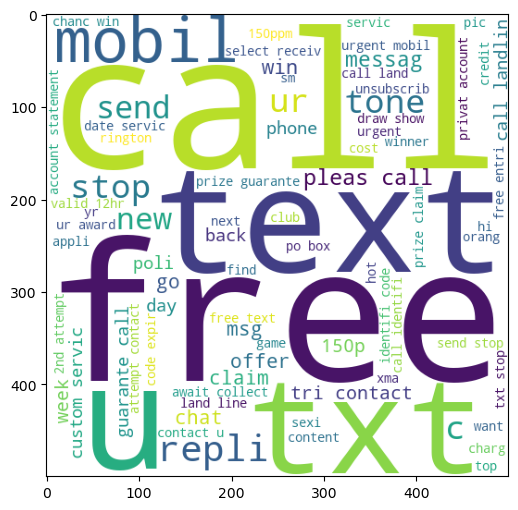

In [48]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

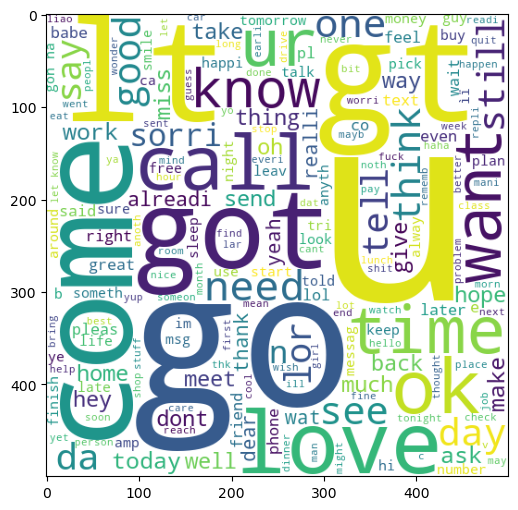

In [49]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

In [52]:
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

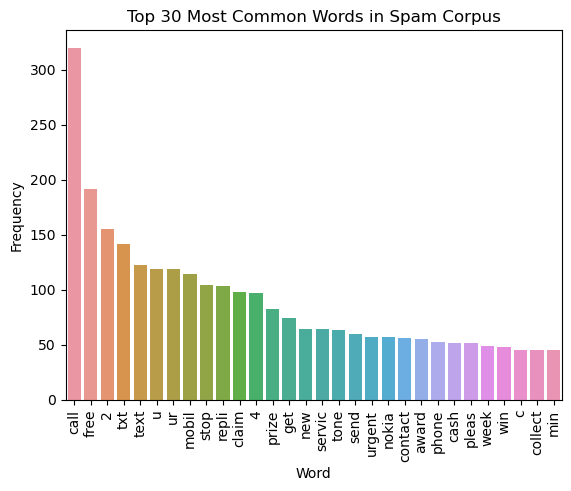

In [53]:
common_words = Counter(spam_corpus).most_common(30)
df_common = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=df_common)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better visibility
plt.title('Top 30 Most Common Words in Spam Corpus')  # Add a title for clarity
plt.show()

In [54]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

In [56]:
# # from collections import Counter
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

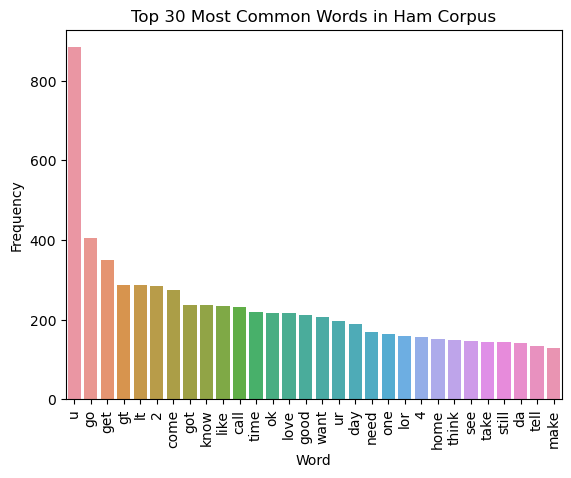

In [57]:
common_words_ham = Counter(ham_corpus).most_common(30)
df_common_ham = pd.DataFrame(common_words_ham, columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=df_common_ham)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better visibility
plt.title('Top 30 Most Common Words in Ham Corpus')  # Add a title for clarity
plt.show()

## Model Building 

In [59]:
# bag of word
from sklearn.feature_extraction.text import  CountVectorizer
cv=CountVectorizer()

In [60]:
x=cv.fit_transform(data["transformed_text"]).toarray()

In [61]:
x.shape

(5169, 6708)

In [62]:
y=data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=2)

In [64]:
from  sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [66]:
gnb.fit(x_train,y_train)

GaussianNB()

In [67]:
y_pred1=gnb.predict(x_test)
y_pred1

array([0, 1, 1, ..., 0, 0, 0])

In [68]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [69]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [70]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [71]:
# using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

x=tfidf.fit_transform(data["transformed_text"]).toarray()

In [72]:
x.shape

(5169, 3000)

In [73]:
y=data['target'].values

In [74]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=2)

In [75]:
from  sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [77]:
gnb.fit(x_train,y_train)

GaussianNB()

In [78]:
y_pred1=gnb.predict(x_test)
y_pred1

array([0, 1, 1, ..., 0, 0, 0])

In [79]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [80]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [81]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [82]:
# tfidf=mnb

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [85]:
clfs = {
    'SVC' : svc,
    # 'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [86]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    
    return accuracy,precision


In [87]:
train_classifier(svc,x_train,y_train,x_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [88]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [89]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [90]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.970986,1.000000
4,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
3,LR,0.958414,0.970297
5,AdaBoost,0.960348,0.929204
8,GBDT,0.946809,0.919192
6,BgC,0.958414,0.868217
2,DT,0.927466,0.811881


In [91]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [92]:

performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.970986
1,RF,Accuracy,0.975822
2,SVC,Accuracy,0.975822
3,ETC,Accuracy,0.974855
4,LR,Accuracy,0.958414
5,AdaBoost,Accuracy,0.960348
6,GBDT,Accuracy,0.946809
7,BgC,Accuracy,0.958414
8,DT,Accuracy,0.927466
9,NB,Precision,1.000000


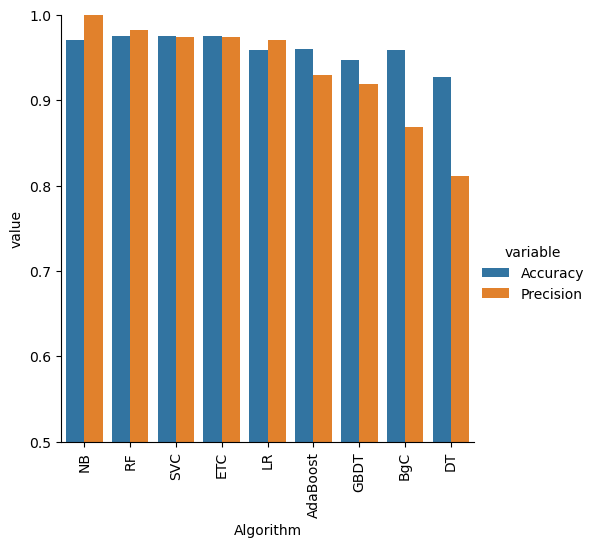

In [93]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()